# Разработка стратегии взаимодействия с пользователями на основе аналитических данных

**Цель**:  
Провести анализ собранных компанией данных и подготовить план действий по удержанию клиентов
**Исходные данные**:  
Датасет с данными анкет клиентов компании (gym_churn.csv)

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Модель-прогнозирования-оттока-пользователей" data-toc-modified-id="Модель-прогнозирования-оттока-пользователей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Модель прогнозирования оттока пользователей</a></span></li><li><span><a href="#Кластеризация-пользователей" data-toc-modified-id="Кластеризация-пользователей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Кластеризация пользователей</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

## Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage



In [2]:
df = pd.read_csv('gym_churn.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
#приведём названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


В некоторых столбцах значения принимают 0 и 1 принимается за 1 положительный, а 0 за отрицательный вариант ответа (не касается столбца "gender"). Пропущенных значений нет, недопустимых значений также не наблюдается

Посмотрим на средние значения в разрезе наличия оттока клиентов

In [7]:
df[df['churn'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
gender,1061.0,0.510839,0.500118,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,1061.0,0.768143,0.422217,0.000000,1.000000,1.000000,1.000000,1.000000
partner,1061.0,0.355325,0.478837,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,1061.0,0.183789,0.387495,0.000000,0.000000,0.000000,0.000000,1.000000
phone,1061.0,0.902922,0.296204,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,1061.0,1.728558,2.132371,1.000000,1.000000,1.000000,1.000000,12.000000
group_visits,1061.0,0.268615,0.443448,0.000000,0.000000,0.000000,1.000000,1.000000
age,1061.0,26.989632,2.895163,18.000000,25.000000,27.000000,29.000000,38.000000
avg_additional_charges_total,1061.0,115.082899,77.696419,0.148205,50.629127,103.814686,165.616858,425.535220
month_to_end_contract,1061.0,1.662582,1.964593,1.000000,1.000000,1.000000,1.000000,12.000000


In [8]:
df[df['churn'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
gender,2939.0,0.510037,0.499984,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,2939.0,0.873086,0.332933,0.000000,1.000000,1.000000,1.000000,1.000000
partner,2939.0,0.534195,0.498914,0.000000,0.000000,1.000000,1.000000,1.000000
promo_friends,2939.0,0.353522,0.478144,0.000000,0.000000,0.000000,1.000000,1.000000
phone,2939.0,0.903709,0.295040,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,2939.0,5.747193,4.716942,1.000000,1.000000,6.000000,12.000000,12.000000
group_visits,2939.0,0.464103,0.498795,0.000000,0.000000,0.000000,1.000000,1.000000
age,2939.0,29.976523,3.009933,19.000000,28.000000,30.000000,32.000000,41.000000
avg_additional_charges_total,2939.0,158.445715,99.801599,0.171862,76.920993,149.881171,224.448274,552.590740
month_to_end_contract,2939.0,5.283089,4.363522,1.000000,1.000000,6.000000,10.000000,12.000000


Построим распределения признаков для тех, кто ушёл (отток, на графике = 1) и тех, кто остался (не попали в отток, на графике = 0)

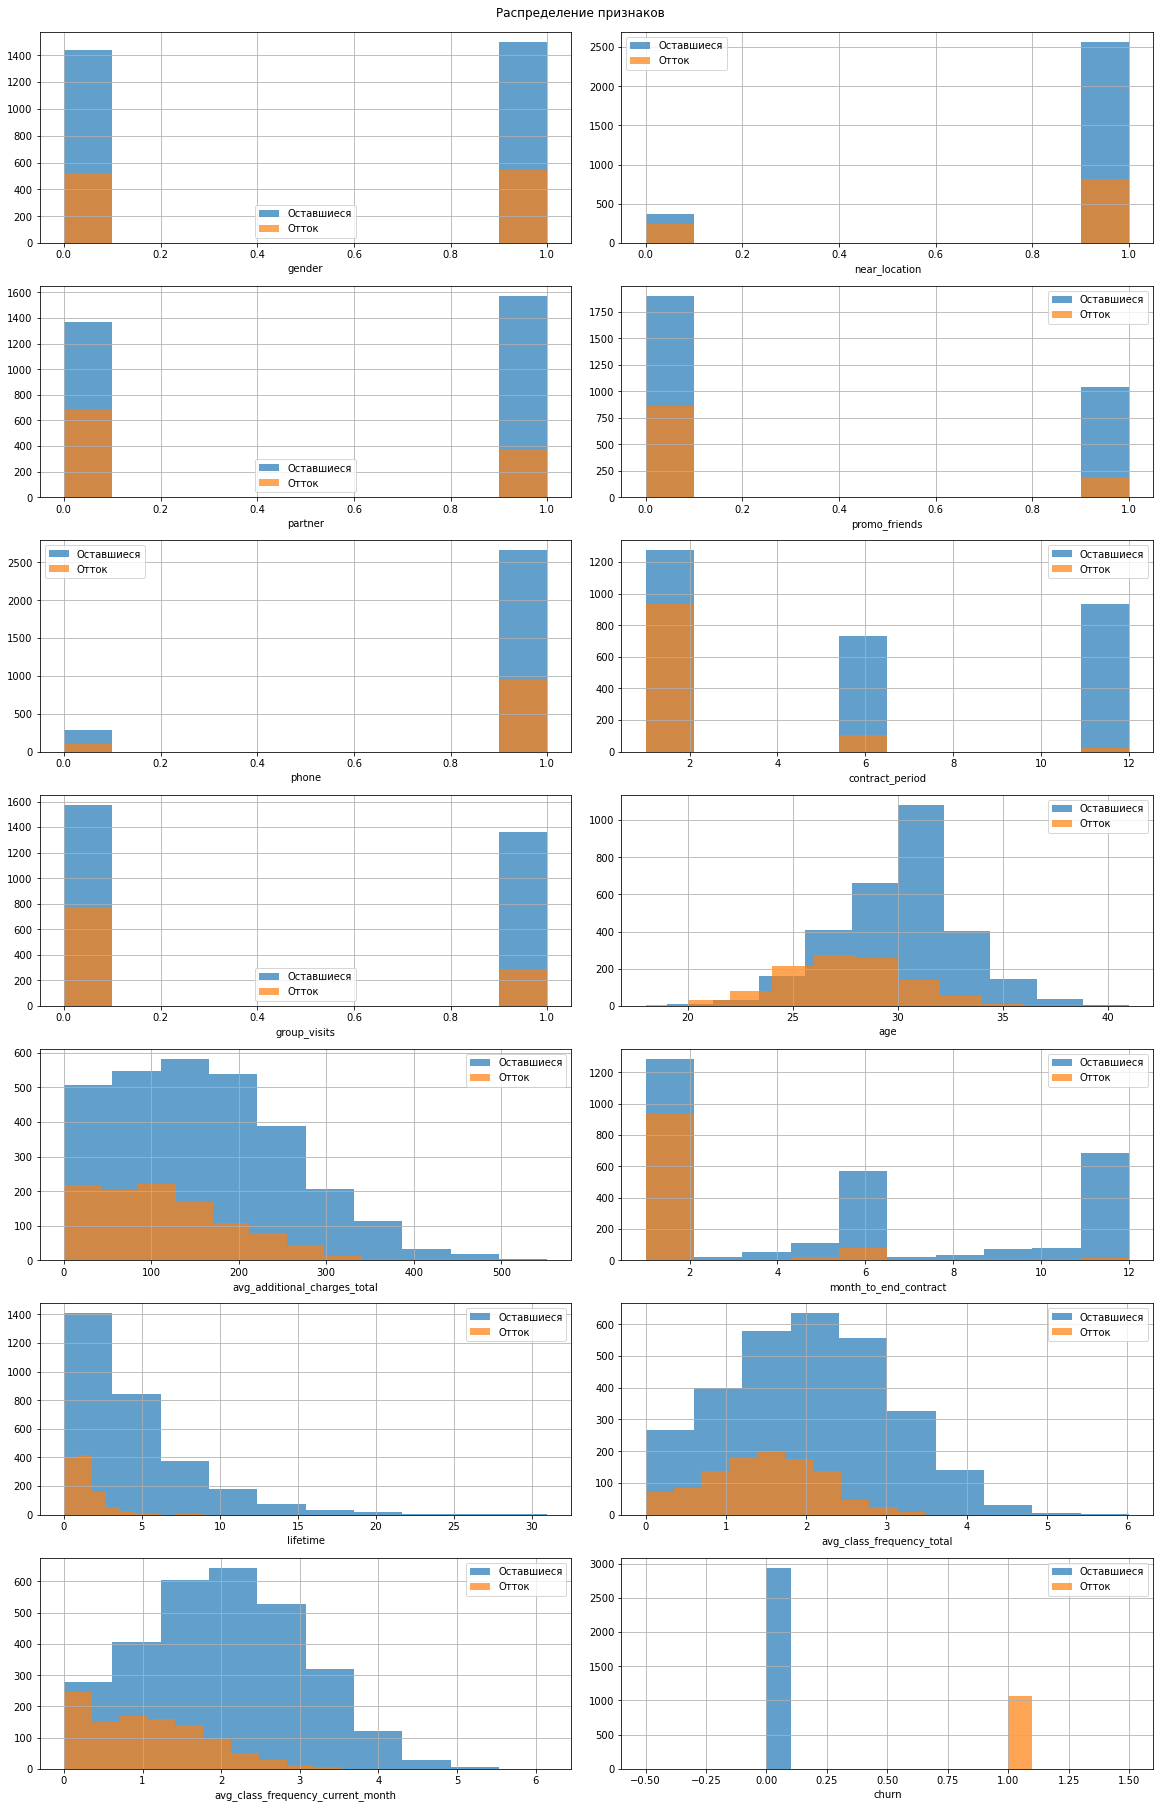

In [9]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 25), constrained_layout=True)

for col, col_name in enumerate(df):
    df.query('churn == 0')[col_name].hist(alpha=0.7, label='Оставшиеся', ax=axes[col // 2, col % 2])
    df.query('churn == 1')[col_name].hist(alpha=0.7, label='Отток', ax=axes[col // 2, col % 2])
    axes[col // 2, col % 2].set_xlabel(col_name)
    axes[col // 2, col % 2].legend() 
fig.suptitle('Распределение признаков');

И также посмотрим на матицу корреляций признаков и отобразим на графике

In [10]:
df.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


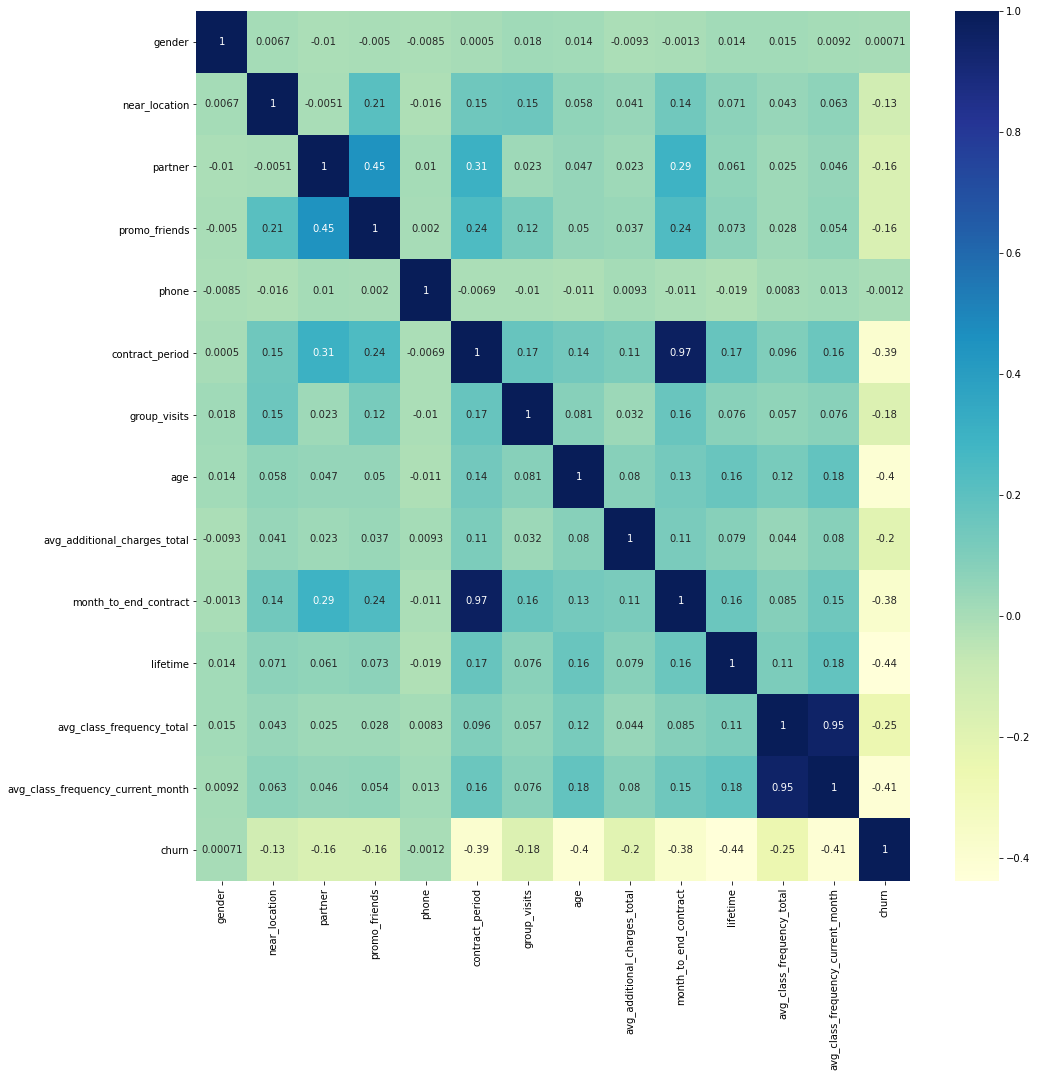

In [11]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");

По первичному изучению данных уже можно определить некий портрет клиентов, кто ушел (отток). Данный клиент:
   * чаще находится в отделенных районах
   * чаще не является сотрудником компании-партнера
   * чаще узнал о клубе не от друга/коллеги, а из иных источников (не участвовал в акции "Приведи друга")
   * не посещающие групповые тренировки
   * имеющие абонемент сроком 1 месяц
   * посещающие клуб недавно (1-3 месяца) примерно 1-2 раза в неделю
   * не зависит от гендера
  
По матрице корреляции можем заметить признаки наиболее влияющие на отток клиентов:  
   * длительность текущего действующего абонемента (коэфициент корреляции равен -0.39)
   * срок до окончания текущего действующего абонемента (коэфициент корреляции равен -0.38)
   * возраст (коэфициент корреляции равен -0.4)
   * время с момента первого обращения в фитнес-центр (коэфициент корреляции равен -0.44)
   * средняя частота посещений в неделю за предыдущий месяц (коэфициент корреляции равен -0.41)
  
Наблюдаются мультиколлинеарные признаки: contract_period и month_to_end_contact, avg_class_frequency_current_month и avg_class_frequency_total

## Модель прогнозирования оттока пользователей

Построим модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце

Для начала разобьем данные на обучающую и валидационную выборку функцией train_test_split()

In [12]:
X = df.drop(['churn'], axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом. А также оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке и определим лучшую модель

In [13]:
lr_model = LogisticRegression(random_state=0, solver='liblinear')
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [14]:
print('Метрики для модели логистической регрессии:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, lr_predictions),
    precision_score(y_test, lr_predictions),
    recall_score(y_test, lr_predictions)
))

Метрики для модели логистической регрессии:
accuracy_score: 0.9225
precision_score: 0.8541666666666666
recall_score:0.8282828282828283


In [15]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [16]:
print('Метрики для модели случайного леса:')
print('accuracy_score: {}\nprecision_score: {}\nrecall_score:{}'.format(
    accuracy_score(y_test, rf_predictions),
    precision_score(y_test, rf_predictions),
    recall_score(y_test, rf_predictions)
))

Метрики для модели случайного леса:
accuracy_score: 0.915
precision_score: 0.8385416666666666
recall_score:0.8131313131313131


In [17]:
features = pd.DataFrame(lr_model.coef_.T, X.columns).reset_index()
features.columns = ['feature', 'coef']
features['coef'] = features['coef'].apply(lambda x: abs(x))
features = features.sort_values(by='coef', ascending=False)
print('Коэффициенты признаков в оптимальной функции логистической регрессии:')
print(features)

Коэффициенты признаков в оптимальной функции логистической регрессии:
                              feature      coef
12  avg_class_frequency_current_month  4.426492
10                           lifetime  3.720057
11          avg_class_frequency_total  3.290506
7                                 age  1.074359
5                     contract_period  0.703741
8        avg_additional_charges_total  0.541020
9               month_to_end_contract  0.520089
6                        group_visits  0.385778
3                       promo_friends  0.268180
2                             partner  0.082845
1                       near_location  0.075301
0                              gender  0.013051
4                               phone  0.005220


Доля правильных прогнозов и полнота чуть выше в модели логистической регрессии, таким образом, модель логистической регрессии показала себя лучше.

## Кластеризация пользователей

Для определения количества кластеров построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму

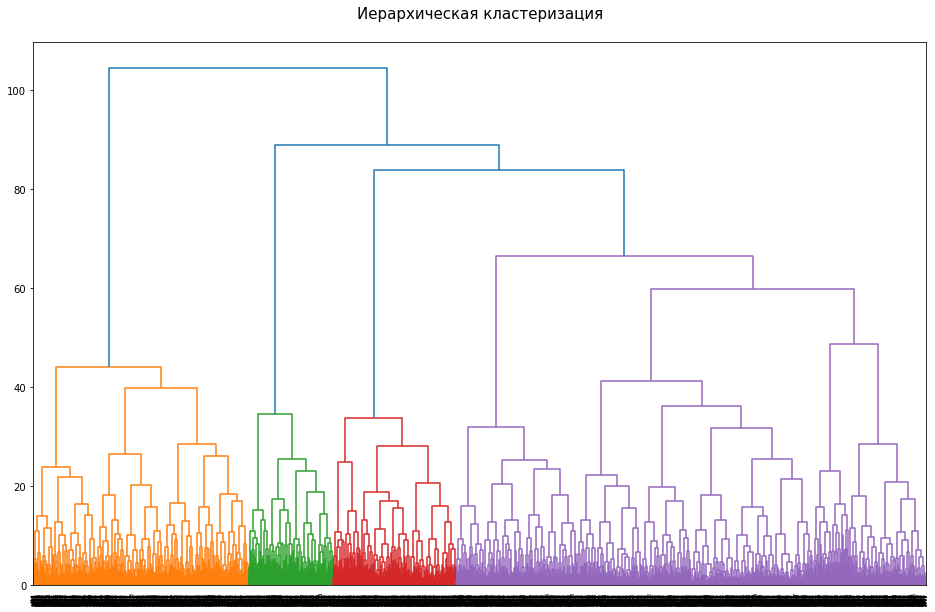

In [18]:
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')

plt.figure(figsize=(16, 10))
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация\n', fontsize=15)
plt.show()

По дендрограмме можно выделить 4 кластера (выделенных цветом). Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов (по ТЗ количество ластеров равно 5)

In [19]:
km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(X_st)
df['cluster_km'] = labels

In [20]:
df['cluster_km'].unique()

array([0, 4, 3, 2, 1])

Изучим средние значения признаков для кластеров

In [21]:
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.480787,0.812559,0.000000,0.086223,1.000000,1.866917,0.325211,28.145267,131.369042,1.791003,2.345829,1.325865,1.086883,0.550141
2,0.559567,0.858002,0.338147,0.197353,0.998797,2.730445,0.448857,30.196149,164.579011,2.519856,5.010830,2.928140,2.934140,0.048135
3,0.509603,0.750320,1.000000,0.451985,1.000000,2.554417,0.303457,28.499360,129.812508,2.370038,2.832266,1.355379,1.176172,0.395647
4,0.495726,0.943376,0.752137,0.541667,1.000000,11.352564,0.564103,29.993590,164.563799,10.376068,4.817308,2.028169,2.020129,0.023504


По средним значениям кластеров можно заметить следующие моменты:
   * у 0-кластера наибольший срок действия абонемента (почти 11 месяцев), большая доля клиентов являются работниками партнеров, высокий lifetime (около 5 мес.) и **низий отток клиентов (2.7%)**
   * у 1-кластера не указан номер телефона клиентов, достаточно высокий срок действия абонемента (около 4.7 мес.), отток клиентов 26%
   * у 2-кластера клиенты не живут/работают в близком расположении к компании, практически не участвовали в промо акции "приведи друга" (около 8%), в среднем ходят 1 раз (иногда 2 раза) в неделю на занятия
   * у 3-кластера все клиенты в близком расположении от компании, имеют небольшой срок действия абонемента, ходят на занятия 1 раз в неделю, **самый большой отток клиентов равный 51%**
   * у 4-кластера клиенты имеют небольшой срок действия абонемента, почти половина клиентов посещает групповые занятия, самый высокий возраст из всех кластеров, клиенты больше тратят на другие услуги компании, у них самый высокий lifetime (в среднем почти 5 мес.), они чаще ходят на занятия (ооло 3-х раз в неделю). Отток клиентов равен 6%

Изучим распределения признаков для кластеров

In [22]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

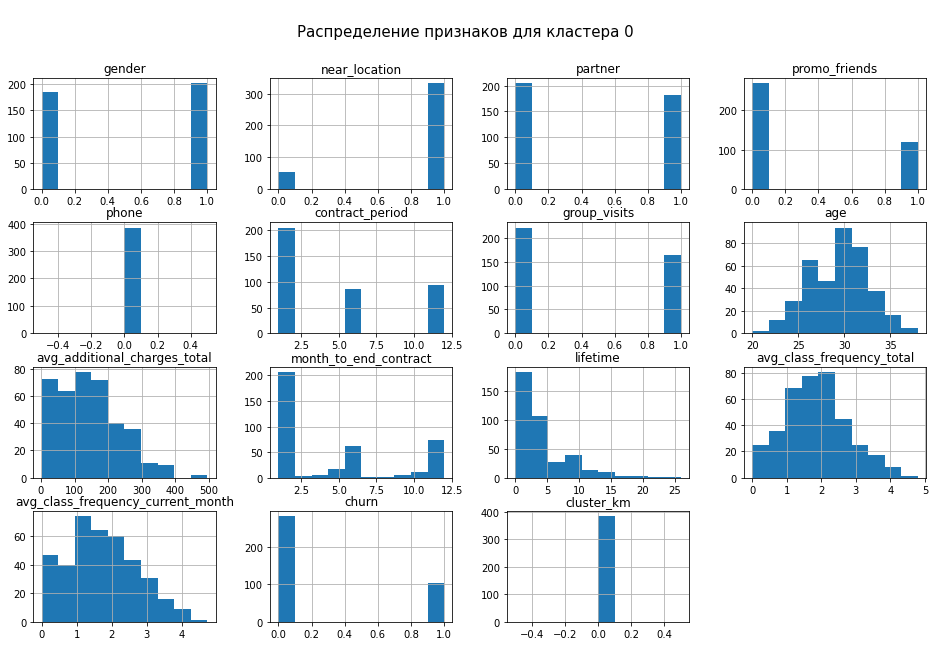

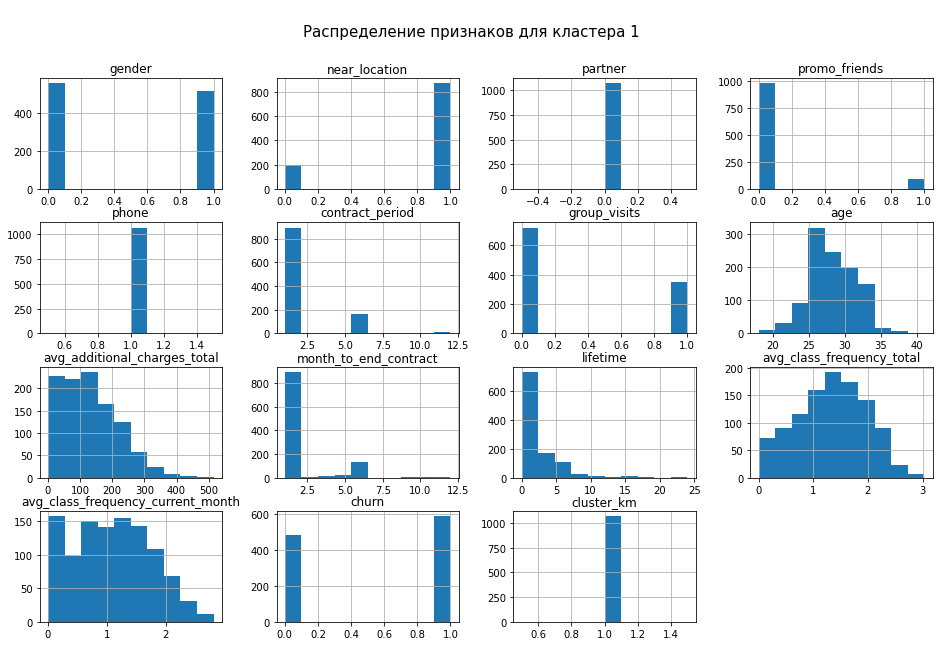

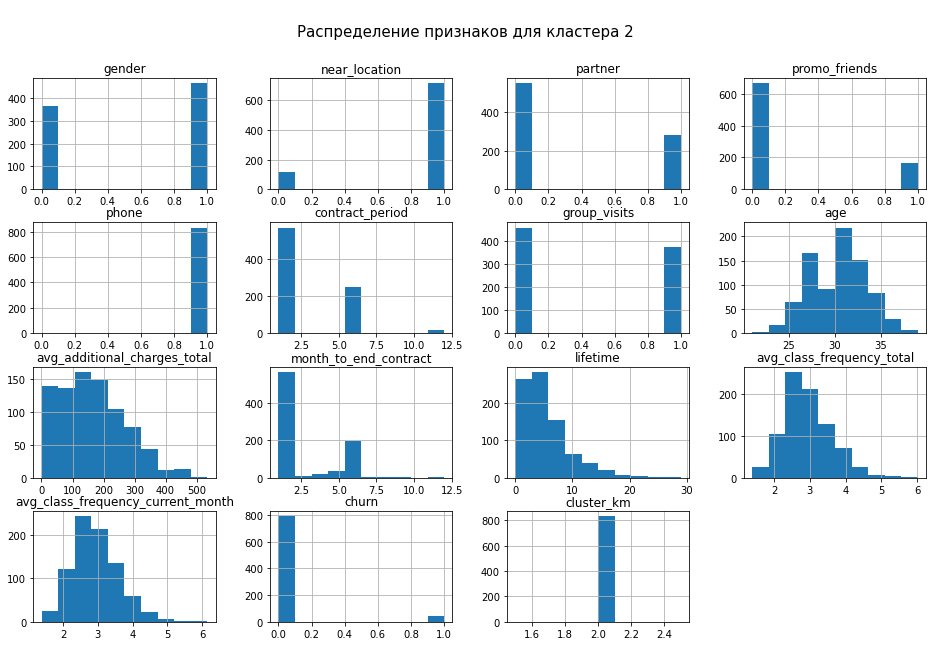

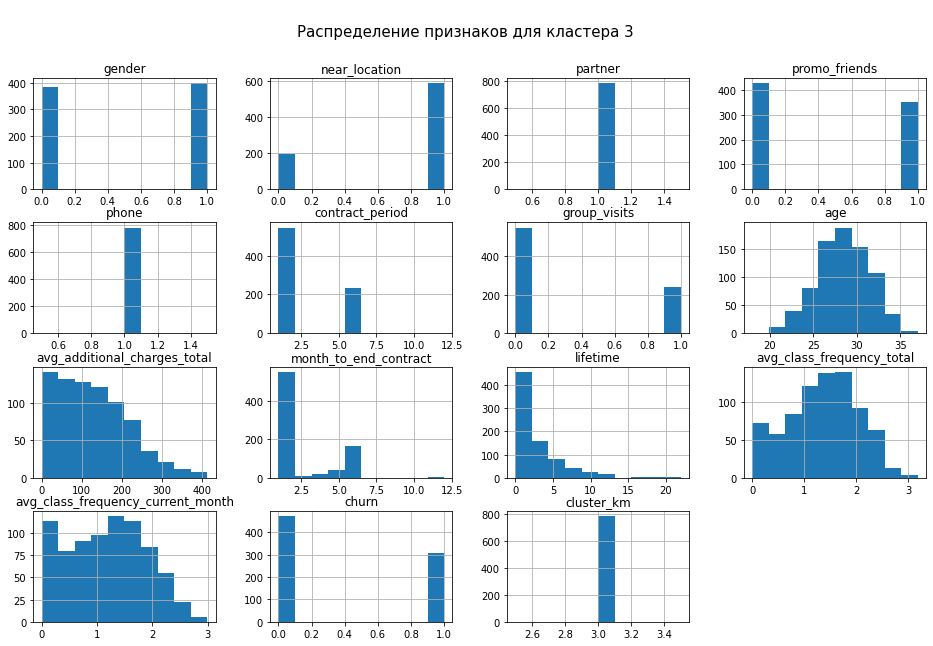

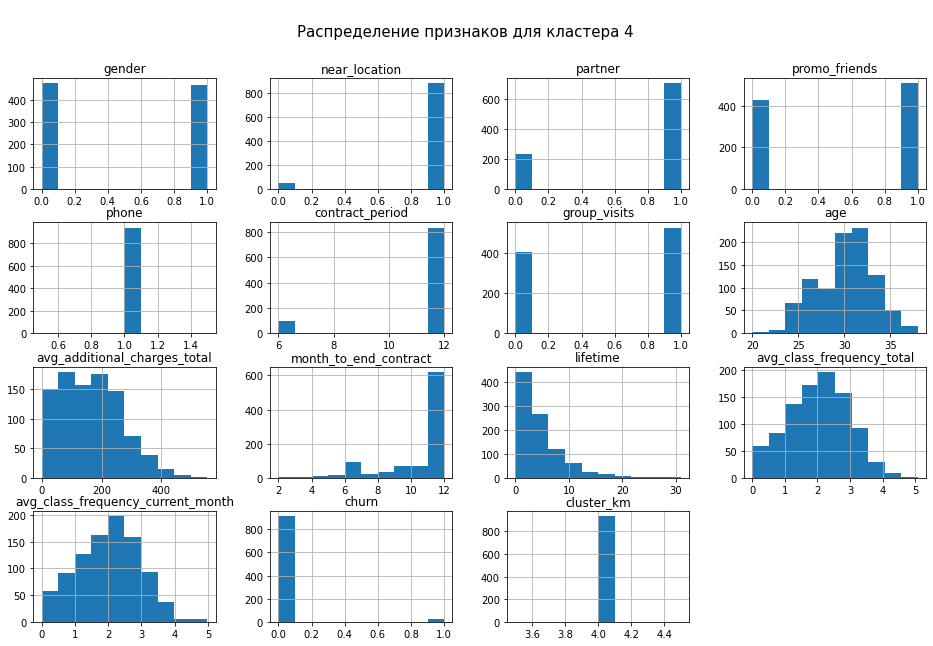

In [23]:
for value in [0, 1, 2, 3, 4]:
    df[df['cluster_km']==value].hist(figsize=(16,10))
    plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
    plt.show()

In [24]:
print('Доля оттока клиентов')
df.groupby('cluster_km').agg({'churn':'mean'})

Доля оттока клиентов


,churn
cluster_km,
0,0.267532
1,0.550141
2,0.048135
3,0.395647
4,0.023504


Посмотрев на распределения каждого признака по каждому кластеру можно дополнить выводы по средним значениям:
   * клиенты 0-го кластера
      - чаще ходят на групповые и приобретают абонемент сроком на 12 месяцев (иногда на 6)
      - живут/работают в близкой доступности к компании
      - 4/5 часть клиентов являются партнерами
      - 3/5 клиентов участвовали в проко-акции "приведи друга". 
   * клиенты 1-го кластера 
      - приносят маленькую выручку с доп. услуг
      - бОльшая часть клиентов приобретают абонемент на 1 мес.
      - больше половины стали клиентом компании не более 5 мес.
      - почти половина является сотрудниками партнеров
      - только 1/4 часть клиентов поучаствовали в промо-акции
   * клиенты 2-го кластера
      - примерно 4/5 имеют абонемент сроком 1 мес.
      - не посещают групповые тренировки
      - больше 3/5 клиентов кластера присоединились к компании в течение 3-х месяцев
   * клиенты 3-го кластера
      - имеют большую выручку с доп. услуг
      - больше 80% имеют абонемент сроком 1 мес 
      - больше 60% присоединились к компании недавно
      - бОльшая часть не является сотрудником партнера
      - бОльшая часть не участвовала в промо-акции "приведи друга"
   * клиенты 4-го кластера
      - посещают тренировки 2-4 раза в неделю
      - чуть больше половины ходят на групповые
      - большая часть клиентов присоединилась в течение 9 мес.

## Выводы и рекомендации

Для лучшего сравнения кластеров отобразим результаты в виде таблицы

| Признак | 0 кластер | 1 кластер | 2 кластер | 3 кластер | 4 кластер |
| ------------- |:-------------:|:-----:|:-----:|:-----:|:-----:|
| Количество клиентов | 1011 | 385 | 505 | 1262 | 837 |
| Отток | 2.7% | 26% | **44%** | **51%** | 6.8% |
| Пол | 50/50 | 50/50 | 50/50 | 50/50 | 45/55 |
| Проживают или работают в районе, где находится фитнес-центр | 95%  | 86% | 0% | 100% | 97% |
| Являются сотрудниками компаний-партнеров | 78% | 47% | 46% | 35% | 35% |
| Участвовали в промо-акции "приведи друга" | 57% | 30% | **7.9%** | **24%** | 22% |
| Посещают групповые тренировки | 54% | 42% | **21%** | **34%** | 47% |
| Указали контактный номер телефона | Да | Нет | Да | Да | Да (1 не указал) |
| Срок действия абонемента | Преобладают абонементы на 12 мес. | Преобладают абонементы на 1 мес. | Преобладают абонементы на 1 мес. | Преобладают абонементы на 1 мес. | Преобладают абонементы на 1 мес. |
| Среднее время с момента первого обращения (мес.) | 4.7 | 3.9 | 2.8 | 2.4 | 4.8 |
| Количество посещений в неделю у большинства клиентов | 2 раза | 1 раз | 2 раза | 1 раз | 3 раза |
| Максимальная выручка от доп. услуг | до 200 | до 100 | до 200 | выше 200 | до 200 |

2 и 3 кластеры более склонны к оттоку, чем остальные. На отток клиентов влияет участие в промо-акциях и посещение групповых тренировок - что достаточно логично, т.к. участие в акциях позволяет уменьшить стоимость абонемента, а посещение групповых поддерживает мотивацию (поддержка тренера, сравнение себя с другими). Также в некоторых фитнес-клубах для посещения только групповых делают отдельные абонементы, которые также отличаются стоимостью (об особенностях абонементов стоит уточнить у заказчиков).  
  
3 кластер отличается клиентами, которые больше всего потратились на доп. услуги, в таком случае стоит обратить внимание на работу массажных кабинетов или обсуживание в кафе. Отток клиентов мог быть по причине плохого предоставления услуг, обычно о таком пишут в отзывах на популярных платформах.
  
**Рекоммендуемые стратегии:**  
   * добавить больше интересных групповых тренировок, дать наставления тренерам больше уделять времени клиентам
   * добавить промо-акции для привлечения большего количества клиентов
   * проверить уровень качества предоставления дополнительных услуг